# Merging the combined 100m population data with the 1km geometry from Baden Württemberg

In [1]:
import pandas as pd 
import os
import geopandas as gpd
import matplotlib as plt

## Importing the data
gitter1km is the 1km gitter geometry for Baden Württemberg
bev is the population data. It needs to be transformed from a dataframe to a geo dtaframe

In [2]:
gitter1km = gpd.read_file("bw_gitter.geojson")

In [45]:
bev = pd.read_csv("bevBw.csv")
bev["Coordinates"] = gpd.GeoSeries.from_wkt(bev["geometry"])
bevgpd = gpd.GeoDataFrame(bev, crs="EPSG:3035", geometry= 'Coordinates')
bevgpd = bevgpd.to_crs("EPSG:4326")

In [41]:
gitter1km = gitter1km.to_crs("EPSG:4326")

0    POLYGON ((7.66372 47.53262, 7.66331 47.54161, ...
1    POLYGON ((7.67699 47.53290, 7.67658 47.54190, ...
2    POLYGON ((7.69025 47.53318, 7.68985 47.54218, ...
3    POLYGON ((7.70352 47.53346, 7.70312 47.54246, ...
4    POLYGON ((7.63678 47.54104, 7.63636 47.55004, ...
Name: geometry, dtype: geometry

## A spatial join of the two data frames 
keeping the coordinates of the 1km cells

In [50]:
bev1km = gpd.sjoin(gitter1km, bevgpd, how = "inner")


The pivot table to summarize the values per 1km cell

In [53]:
bev1km = bev1km.pivot_table(values = ["INSGESAMT", "ALTER_10JG"], index = "ID_1km",  aggfunc= "sum")

In [54]:
bev1km.head()

,ALTER_10JG,INSGESAMT
ID_1km,,
1kmN2716E4145,3.0,14.0
1kmN2716E4146,52.0,351.0
1kmN2716E4147,31.0,161.0
1kmN2716E4148,21.0,109.0
1kmN2717E4143,0.0,0.0


Transforming back to a dataframe with geometry

In [55]:
bevT = bev1km.reset_index()
bevT = gitter1km.merge(bevT)
bevT.head()

,ID_1km,geometry,ALTER_10JG,INSGESAMT
0,1kmN2716E4145,"POLYGON ((7.66372 47.53262, 7.66331 47.54161, ...",3.0,14.0
1,1kmN2716E4146,"POLYGON ((7.67699 47.53290, 7.67658 47.54190, ...",52.0,351.0
2,1kmN2716E4147,"POLYGON ((7.69025 47.53318, 7.68985 47.54218, ...",31.0,161.0
3,1kmN2716E4148,"POLYGON ((7.70352 47.53346, 7.70312 47.54246, ...",21.0,109.0
4,1kmN2717E4143,"POLYGON ((7.63678 47.54104, 7.63636 47.55004, ...",0.0,0.0


In [56]:
bevT.to_file("bev1kmF.geojson", driver='GeoJSON')

## Summary Statistics and a plot 

In [58]:
print(bevT["INSGESAMT"].describe())
print(bevT["ALTER_10JG"].describe())


count    36424.000000
mean       367.822150
std        984.362508
min          0.000000
25%          0.000000
50%         22.000000
75%        239.250000
max      20536.000000
Name: INSGESAMT, dtype: float64
count    36424.000000
mean        43.005409
std         99.150336
min          0.000000
25%          0.000000
50%          3.000000
75%         35.000000
max       1457.000000
Name: ALTER_10JG, dtype: float64


<AxesSubplot: >

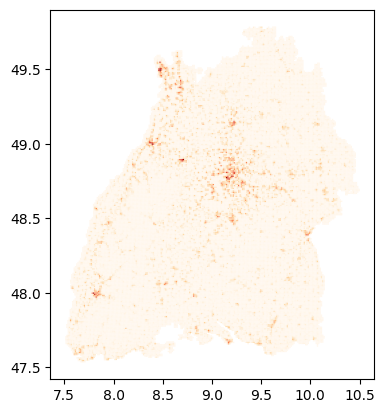

In [60]:
bevT.plot(column="ALTER_10JG",cmap='OrRd')